# Board Game Analysis
Examining some board game data from [board game geek](http://www.boardgamegeek.com/). It becomes evident pretty quickly that there is a large correlation between ownership and the review score, but I'm trying to see what else is going on, to try and find hidden gems

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
bgr = pd.read_csv('board_games.csv')
bgr = bgr[bgr['users_rated'] != 0]
bgr.head(10)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


# Determining An Error Metric and Getting Familiar with the Dataset

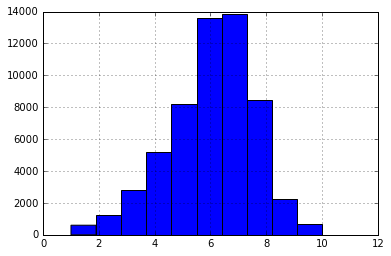

stddev: 1.5785522573378534 
 mean: 6.015910848556213


In [2]:
bgr.average_rating.hist()
plt.show()

print('stddev:',bgr.average_rating.std(),'\n', 'mean:',bgr.average_rating.mean())

With the games with an average score of 0.0 removed from the dataset, a normal distribution appears to fit the data nicely. Because the distribution appears to be continuous, a metric such as absolute error or RMS error are good options. To penalize larger errors, we'll move forward with MSE as the error metric of choice.

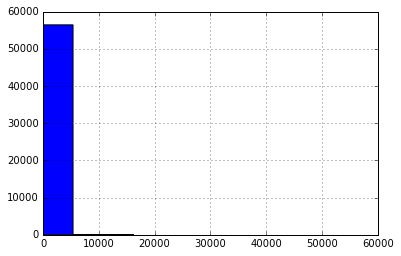

In [8]:
bgr.users_rated.hist()
plt.show()


The histogram above illustrates that most board games have relatively few reviews, and that games that have more reviews are outliers. there isn't any quantitative continuity between this large quantity of games with fewer reviews and games with a larger amount reviews.

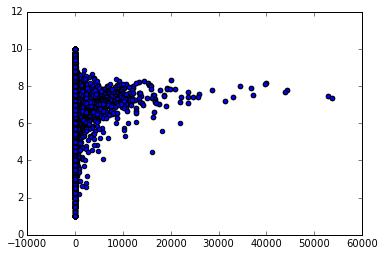

In [4]:
plt.scatter(bgr.users_rated,bgr.average_rating)
plt.show()

The above scatterplot shows `users_rated` on the x axis and `average_rating` on the y axis. It's interesting to see that so many games still have so few reviews. It might be interesting to plot the games with reviews that aren't on the order of 10000 and see how they are scatter. The outliers with a large quantity of reviews are intuitively more highy rated. 
NOTE: add this plot to the clustering section

# Clustering

In [4]:
from sklearn.cluster import KMeans
bgr = bgr.dropna()
numeric_columns = list(bgr.columns[3:])
kmc = KMeans(n_clusters=5)
kmc.fit(bgr[numeric_columns])
labels = kmc.labels_

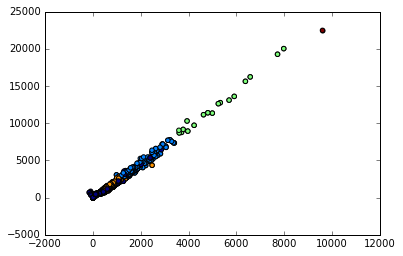

In [5]:
def rowmean(row):
    return row.mean()
def rowstd(row):
    return row.std()

game_mean = bgr[numeric_columns].apply(rowmean,axis=1)
game_std = bgr[numeric_columns].apply(rowstd,axis=1)
plt.scatter(game_mean,game_std,c=labels)
plt.show()
#print(len(game_mean),len(labels))

There's a very strong correlations between the average and the standard deviation of this data. This indicates that a higher rating also entails a larger quantity of reviews. It appears that games have been grouped pretty similarly to how they are scattered above. It's still not clear which columns are strongly correlated though, as this is an aggregate of all of the numerical data available.

# Reviewing Column Correlations

In [10]:
correlations = bgr[numeric_columns].corr()
correlations['average_rating']

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
player_range           -0.007829
time_range              0.025640
Name: average_rating, dtype: float64

I'm surprised that correlations with yearpublished and total_owners are so similar. I'm not sure I understand why that is the case. I'm also surprised that the bayes_average_rating correlation is relatively low, but it must be removed because it corresponds with average_rating and would cause overfitting if left in. 
I think the minimum player age value is especially interesting as it shows that a games for older players get higher ratings. Additionally, player quantities show that games with fewer players are slightly preferred, if at all, over games with more players

# Model Creation
In this attempt at creating a model, training and test subsets will not be used and instead we'll simply evaluate the model's capability based on the whole dataset

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
rel_cols = numeric_columns
rel_cols.remove("average_rating")
rel_cols.remove('bayes_average_rating')
reg.fit(bgr[rel_cols],bgr['average_rating'])
preds = reg.predict(bgr[rel_cols])

In [14]:
rel_cols

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bgr['average_rating'],preds)  ** 0.5

1.4468576211341377

# Conclusions From the Linear Regression MSE
The MSE indicates that our model isn't a great predictor, since it is about as large as the standard deviation of the distribution of given scores. 

# Random Forest Model

In [25]:
from sklearn.cross_validation import KFold
kf = KFold(bgr.shape[0],random_state=1)

from sklearn.ensemble import RandomForestRegressor
bgforest = RandomForestRegressor(n_estimators=15, criterion='mse',min_samples_split=4,max_depth=12,n_jobs=-1,random_state=1)

predictions = []
for train, test in kf:
    train_predictors = (bgr[rel_cols].iloc[train])
    train_target = bgr['average_rating'].iloc[train]
    bgforest.fit(train_predictors, train_target)
    test_predictions = bgforest.predict(bgr[rel_cols].iloc[test,:])
    predictions.append(test_predictions)
    
predictions = np.concatenate(predictions,axis=0)

mean_squared_error(bgr['average_rating'],predictions) ** 0.5

1.349702888317206

# Conclusions and Next Steps
After applying a more nuanced prediction model, We've gained some accuracy. It would be interesting next to add more features that involve rates of reviewership and comments, since that seems to be a very compelling metric, as seen in the clustered plot above. 

In [4]:
print(bgr.describe())

                  id  yearpublished    minplayers    maxplayers   playingtime  \
count   56932.000000   56930.000000  56930.000000  56930.000000  56930.000000   
mean    64124.321998    1874.770385      2.005041      5.573792     59.908818   
std     57516.147278     486.079228      0.791646     50.757504    406.324651   
min         1.000000   -3500.000000      0.000000      0.000000      0.000000   
25%     16145.750000    1989.000000      2.000000      2.000000     15.000000   
50%     36955.500000    2005.000000      2.000000      4.000000     30.000000   
75%    118610.000000    2011.000000      2.000000      6.000000     60.000000   
max    184260.000000    2017.000000     40.000000  11299.000000  60120.000000   

        minplaytime   maxplaytime        minage   users_rated  average_rating  \
count  56930.000000  56930.000000  56930.000000  56932.000000    56932.000000   
mean      57.446057     59.908818      7.592816    231.211305        6.015911   
std      393.074343    406.

# Adding a Couple Features
Let's add a playing time range and player-size range to see if they have any impact on our models.

In [6]:
bgr['player_range'] = bgr['maxplayers'] - bgr['minplayers']
bgr['time_range'] = bgr['maxplaytime'] - bgr['minplaytime']